In [2]:
# 사전학습 된 FCN-resnet50 불러오기
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained = True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\bkk11/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to C:\Users\bkk11/.cache\torch\hub\checkpoints\fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:03<00:00, 44.2MB/s] 


In [4]:
# 예측만을 위해(학습X) 평가모드 ON
model.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [5]:
# 샘플 이미지 내려받기
import urllib
url, filename = (
    "https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png"
    )
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

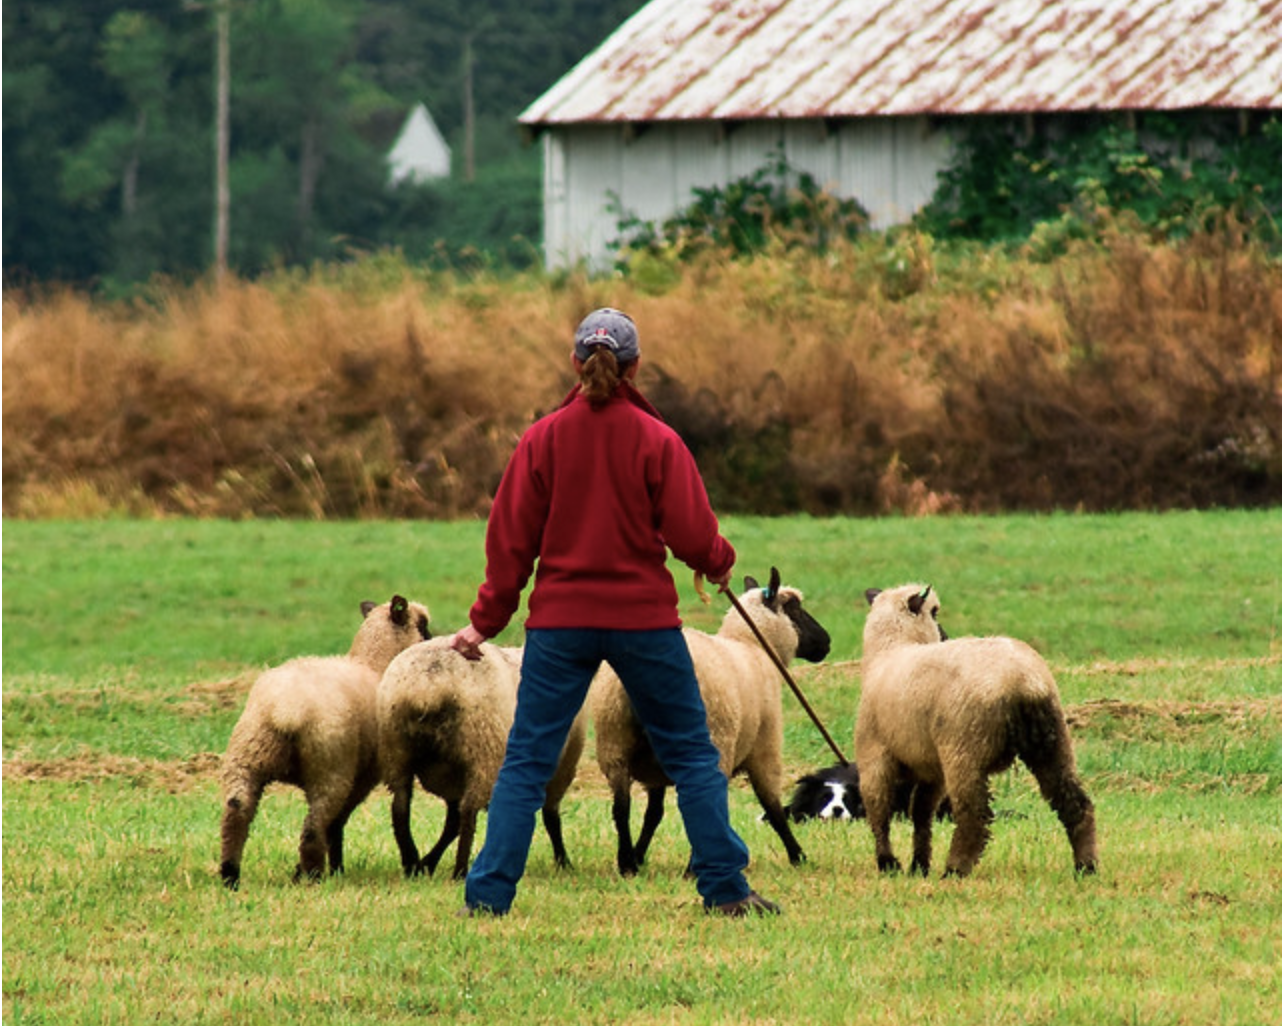

In [24]:
# 이미지 시각화
from PIL import Image
input_image = Image.open(filename)
input_image = input_image.convert('RGB') # RGB (3 채널로 변경)

input_image

In [25]:
# 이미지 전처리(텐서화, 표준화) 구성
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
    ])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

input_tensor.shape, input_batch.shape

(torch.Size([3, 1026, 1282]), torch.Size([1, 3, 1026, 1282]))

In [26]:
# GPU CUDA 사용가능하다면... 
if torch.cuda.is_available(): # CPU만 사용가능하면 False
    input_batch = input_batch.to('cuda')
    model.to('cuda')
# 평가 모드이므로 학습 시 사용되는 메모리 절약 가능
with torch.no_grad(): output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [30]:
# 각 픽셀마다 21개 클래스의 확률값, 각 픽셀마다 최대 확률 클래스 인덱스
output.shape, output_predictions.shape

(torch.Size([21, 1026, 1282]), torch.Size([1026, 1282]))

In [31]:
output_predictions

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])